# ***Prepared by:***

202211479 + Abdullah Kheshfa
202110251 Abdallah khaled,
Habeeb Mohammad Khaleel Habeeb
202011575,
Abdul rahman al husseini 202211325 ,
Fathy Al ghandoor 202211770


Loading and importing the libaries needed

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge # used for l2 regularization, adds a penalty to the coeeffcient to help reduce the overfitting.
from sklearn.linear_model import Lasso # used for L1 regularization , helps with feature selection.
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from scipy import stats #This library contains a wide range of statistical functions and tools that are useful for various statistical analysis tasks.
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Loading the dataset

In [3]:
forddata = pd.read_csv('ford.csv')

In [4]:
forddata

model  year  price transmission  mileage fuelType  tax   mpg  \
0       Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7   
1        Focus  2018  14000       Manual     9083   Petrol  150  57.7   
2        Focus  2017  13000       Manual    12456   Petrol  150  57.7   
3       Fiesta  2019  17500       Manual    10460   Petrol  145  40.3   
4       Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
17960   Fiesta  2016   7999       Manual    31348   Petrol  125  54.3   
17961    B-MAX  2017   8999       Manual    16700   Petrol  150  47.1   
17962    B-MAX  2014   7499       Manual    40700   Petrol   30  57.7   
17963    Focus  2015   9999       Manual     7010   Diesel   20  67.3   
17964       KA  2018   8299       Manual     5007   Petrol  145  57.7   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3             1.5  
4             1.0  
...           ...  
17960         1.2  
17961         1.4  
17962         1.0  
17963         1.6  
17964         1.2  

[17965 rows x 9 columns]

In [5]:
forddata['model'].value_counts()


model
Fiesta                   6557
Focus                    4588
Kuga                     2225
EcoSport                 1143
C-MAX                     543
Ka+                       531
Mondeo                    526
B-MAX                     355
S-MAX                     296
Grand C-MAX               247
Galaxy                    228
Edge                      208
KA                        199
Puma                       80
Tourneo Custom             69
Grand Tourneo Connect      59
Mustang                    57
Tourneo Connect            33
Fusion                     16
Streetka                    2
Ranger                      1
Escort                      1
Transit Tourneo             1
Name: count, dtype: int64

Before Cleaning

In [6]:
forddata.describe()

year         price        mileage           tax           mpg  \
count  17965.000000  17965.000000   17965.000000  17965.000000  17965.000000   
mean    2016.866574  12279.756415   23363.630504    113.334539     57.906991   
std        2.050346   4741.382606   19472.114690     62.010438     10.125977   
min     1996.000000    495.000000       1.000000      0.000000     20.800000   
25%     2016.000000   8999.000000    9987.000000     30.000000     52.300000   
50%     2017.000000  11291.000000   18243.000000    145.000000     58.900000   
75%     2018.000000  15299.000000   31064.000000    145.000000     65.700000   
max     2060.000000  54995.000000  177644.000000    580.000000    201.800000   

         engineSize  
count  17965.000000  
mean       1.350827  
std        0.432371  
min        0.000000  
25%        1.000000  
50%        1.200000  
75%        1.500000  
max        5.000000

Dropping any records that are after the year 2025 as it is not possible. The dataset had 2 records from the year 2060

In [7]:
forddata = forddata[forddata['year'] <= 2025]


In [8]:
buys_for_each_year =forddata.groupby('year')['model'].count()

**Getting basic information about the dataset for a start**

In [9]:
forddata.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [10]:
forddata.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0

The count for the number of occurances for each model

In [11]:
print(forddata['model'].value_counts())

model
Fiesta                   6556
Focus                    4588
Kuga                     2225
EcoSport                 1143
C-MAX                     543
Ka+                       531
Mondeo                    526
B-MAX                     355
S-MAX                     296
Grand C-MAX               247
Galaxy                    228
Edge                      208
KA                        199
Puma                       80
Tourneo Custom             69
Grand Tourneo Connect      59
Mustang                    57
Tourneo Connect            33
Fusion                     16
Streetka                    2
Ranger                      1
Escort                      1
Transit Tourneo             1
Name: count, dtype: int64


Viusalizing the number each car model is represented in the dataset

<ipython-input-12-e5aa166e1f43>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='model', data=forddata, order=model_counts.index, palette='viridis')


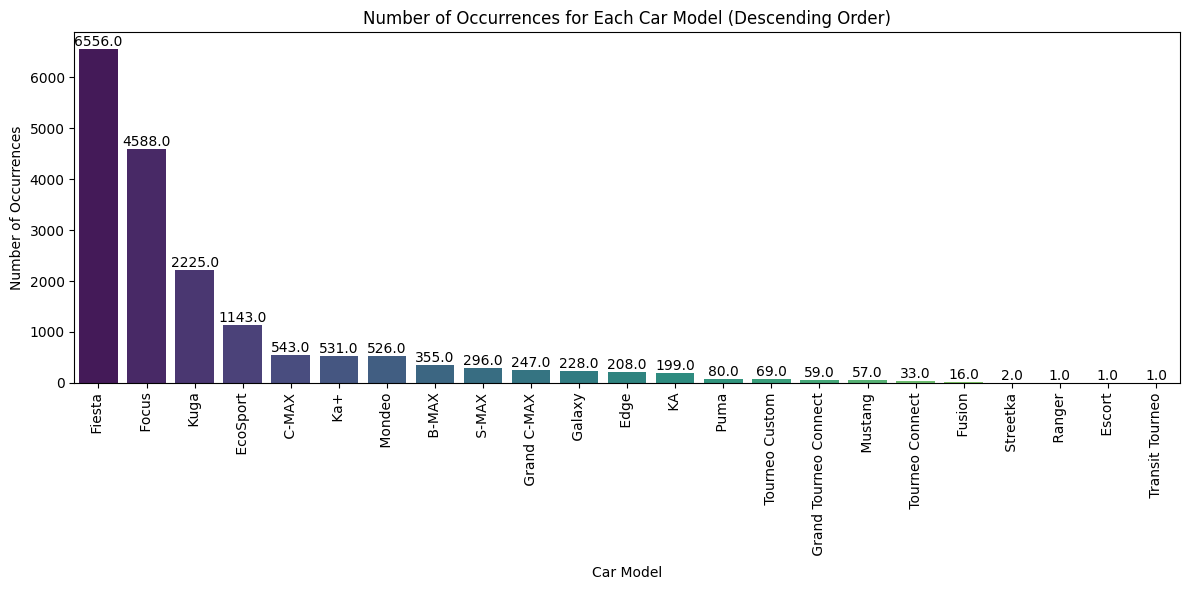

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each car model
model_counts = forddata['model'].value_counts()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='model', data=forddata, order=model_counts.index, palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Car Model')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences for Each Car Model (Descending Order)')

# Add the count on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)
    #annotate is used in matplotlib to add text annotations to the chart.
#xytext pushes the text just above the bar so it can be readable.

plt.tight_layout()
plt.show()

Viusalizing the year of the model

<ipython-input-13-fb55cd3d5384>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=forddata, palette='viridis')


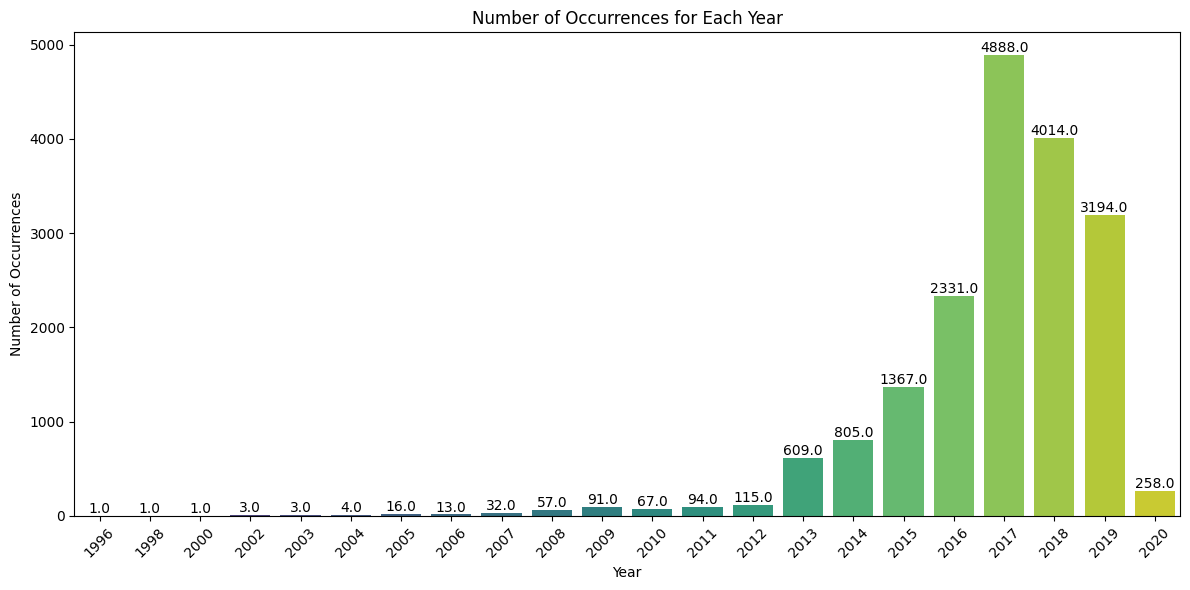

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=forddata, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences for Each Year')

# Add the count on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

Visualizing the different engine sizes in the dataset(0 represents Electric Cars)

<ipython-input-14-881770282060>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='engineSize', data=forddata, palette='viridis')


Text(0.5, 1.0, 'Number of Occurrences for Each EngineSize')

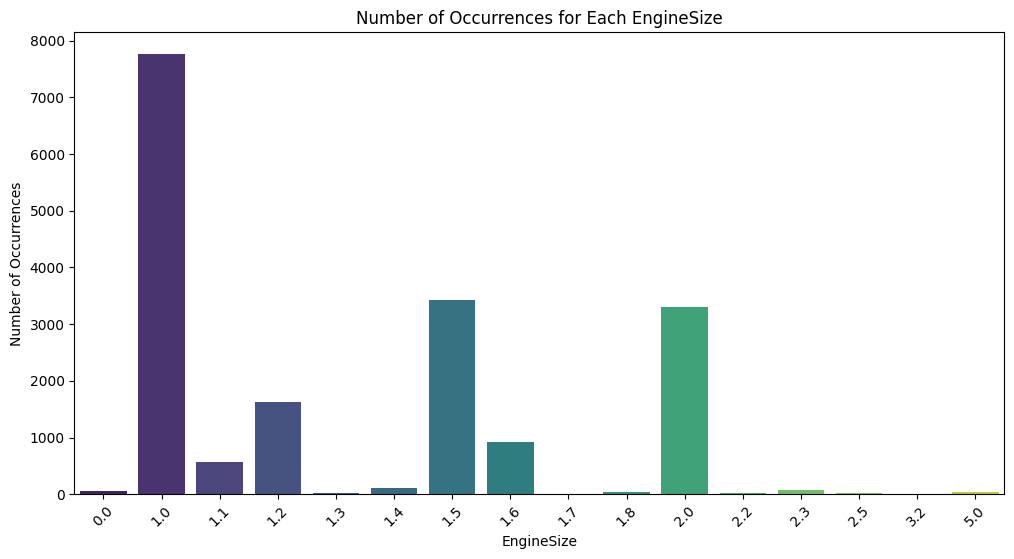

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='engineSize', data=forddata, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('EngineSize')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences for Each EngineSize')

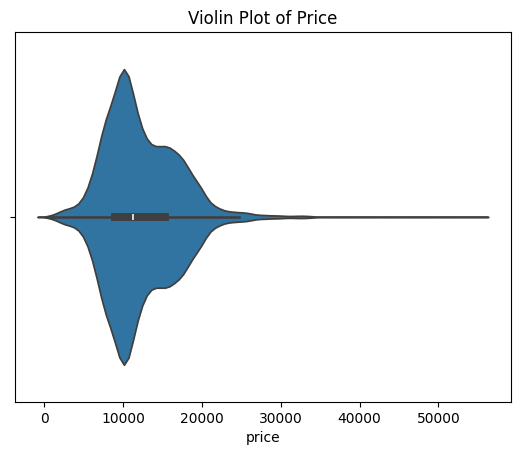

In [15]:
sns.violinplot(x=forddata['price'])
plt.title('Violin Plot of Price')
plt.show()

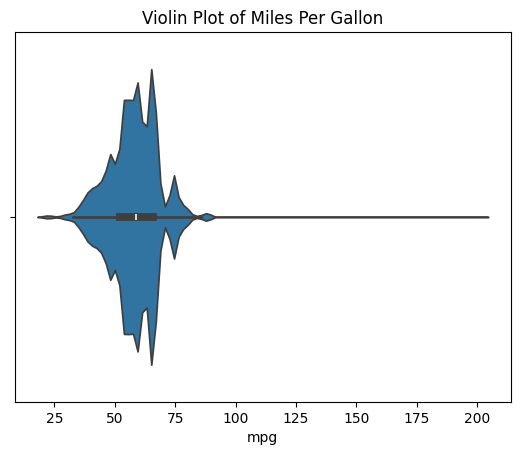

In [16]:
sns.violinplot(x=forddata['mpg'])
plt.title('Violin Plot of Miles Per Gallon')
plt.show()

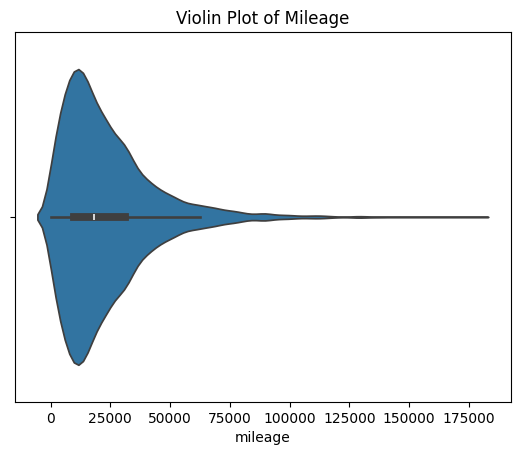

In [17]:
sns.violinplot(x=forddata['mileage'])
plt.title('Violin Plot of Mileage')
plt.show()

Normal Distribuition with slight skeweness

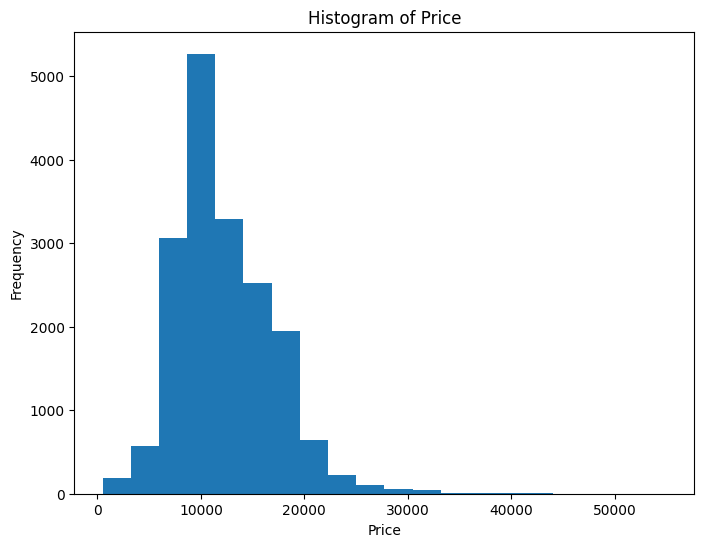

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(forddata['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

Normal Distribuition

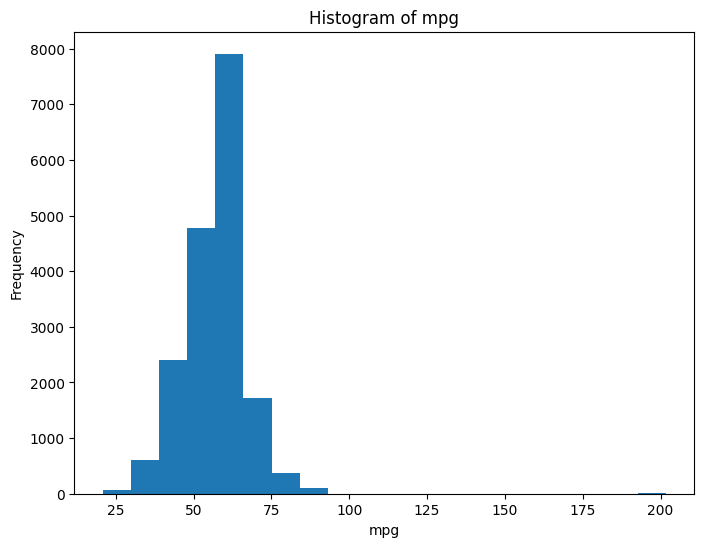

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(forddata['mpg'], bins=20)
plt.xlabel('mpg')
plt.ylabel('Frequency')
plt.title('Histogram of mpg')
plt.show()

Right Skewed

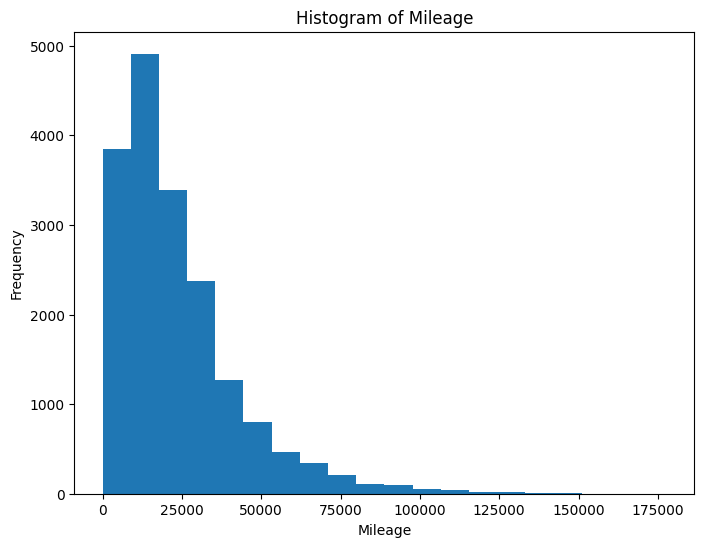

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(forddata['mileage'], bins=20)
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Histogram of Mileage')
plt.show()

**Interactive Visualizations for clearer understanding**

# **Question to be answered : How do the price distributions of Automatic, Manual, and Semi-Auto transmission types compare?**

Price Distribution by Tranmission type

In [21]:
fig = px.box(forddata, x='transmission', y='price',
             title='Price Distribution by Transmission Type',
             labels={'price': 'Price (£)', 'transmission': 'Transmission Type'})
fig.show()

Visualizing The Top 10 year by buys

In [22]:
import plotly.express as px

fig = px.bar(
    x=buys_for_each_year.index.astype(str),  # Convert years to string, if not done the chart will expand to 2060.
    y=buys_for_each_year.values,
    labels={'x': 'Year', 'y': 'Buys'},
    title='Top 10 Years by Buys'
)

fig.update_layout(
    xaxis_tickangle=45, #setting the angle of the tick labels to 45 degrees.
    plot_bgcolor='linen',
    bargap=0.2
)

fig.show()

# **Question: is there a relationship between the car's engine size and its mpg range ?**

Average MPG by Model and we made it in descending order for easier readability for the users.

In [23]:
import plotly.express as px
import pandas as pd

# Assuming 'forddata' contains the 'engineSize' column
# Grouping by 'model' and calculating the mean of 'mpg', then sorting by 'mpg'
sorted_models = (
    forddata.groupby('model').agg(
        mpg=('mpg', 'mean'),
        engineSize=('engineSize', 'mean')
    )
    .sort_values(ascending=False, by='mpg')
    .reset_index()  # Resetting the index so the data can be plotted easily
)

# Create the bar chart
fig = px.bar(
    sorted_models,
    x='model',
    y='mpg',
    color='mpg',  # Adds gradient coloring based on mpg
    color_continuous_scale='Rainbow',  # You can change to 'plasma', 'cividis', etc.
    title='Average MPG by Model (Descending)',
    labels={'mpg': 'Miles per Gallon', 'model': 'Car Model'}
)

# Add engine size as text to display below the model name
fig.update_traces(text=sorted_models['engineSize'].round(2), textposition='outside', texttemplate='%{text}')

# Update the layout to rotate the x-axis labels and other settings
fig.update_layout(
    xaxis_tickangle=45,  # Rotate the chart by 45 degrees for easier readability
    plot_bgcolor='whitesmoke',
    bargap=0.2  # Gap between the bars
)

# Show the figure
fig.show()


**Distrubtion of the mileage present in the dataset**

# **Question: How does the price of cars change with mileage?**

In [24]:
import plotly.express as px

filtered_df = forddata[(forddata['year'] >= 2000) & (forddata['year'] <= 2020)]

fig = px.scatter(
    filtered_df,
    x='mileage',
    y='price',
    color='year',
    hover_data=['model'],
    title='Mileage vs. Price (2000–2020) with Year Color'
)

fig.show()


Ford Car Models By Year And Price

In [25]:
forddata['model'] = forddata['model'].str.strip()

fig = px.treemap(forddata,
                 path=['model', 'year'],
                 values='price',
                 color='price',
                 color_continuous_scale='RdBu',
                 hover_data=['transmission', 'mileage', 'fuelType', 'mpg'],
                 title='Ford Car Models by Year and Price Treemap)')

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    coloraxis_colorbar=dict(title='Price (£)'),
    height=800
)

fig.show()

<ipython-input-25-40c15407c193>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Total price of ford listings per year

In [26]:
grouped_df = forddata.groupby('year', as_index=False)['price'].sum().rename(columns={'price': 'total_price'}) #groups the price column and calculates the sum.
#renames the price column in the dataset to total price.


fig = px.treemap(
    grouped_df,
    path=['year'], #specifies that the treemap will be focused on the year column.
    values='total_price',
    color='total_price',
    color_continuous_scale='Viridis', # color palette that will be used
    title='Total Price of Ford Listings by Year'
)

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25)) # adjusting the spacing in the chart for easier readability.

fig.show()

fig.write_html("ford_treemap_by_year_price.html")

Since mileage has a skewed distribuiton and we want to get rid of the outliers, we will use iqr to get rid of them.

In [27]:
fig = px.histogram(forddata, x='mileage', nbins=30, title='Distribution of Mileage')
fig.update_layout(bargap=0.2)
fig.show()

In [28]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

# Apply to both columns
forddata = remove_outliers_iqr(forddata, 'mileage')
#forddata = remove_outliers_iqr(forddata, 'price')

Since price and mpg is normally distributed we will use the zscore method to get rid of the outliers

In [29]:
z_scores = np.abs(stats.zscore(forddata['price']))
forddata = forddata[z_scores < 3] # removing the outliers using the z score in the price column.

In [30]:
z_scores = np.abs(stats.zscore(forddata['mpg']))
forddata = forddata[z_scores < 3] #removing the outliers using the z score in the mpg column

Checking the types of data present in the dataset

After cleaning

In [31]:
forddata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16802 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         16802 non-null  object 
 1   year          16802 non-null  int64  
 2   price         16802 non-null  int64  
 3   transmission  16802 non-null  object 
 4   mileage       16802 non-null  int64  
 5   fuelType      16802 non-null  object 
 6   tax           16802 non-null  int64  
 7   mpg           16802 non-null  float64
 8   engineSize    16802 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.3+ MB


Checking the amount of null values in the dataset

In [32]:
forddata.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Statistical information about the data after cleaning

In [33]:
forddata.describe()

year         price       mileage           tax           mpg  \
count  16802.000000  16802.000000  16802.000000  16802.000000  16802.000000   
mean    2017.059993  12393.276693  20473.702000    113.760862     57.994423   
std        1.694154   4144.365524  13954.607479     59.323007      9.172791   
min     1996.000000   1294.000000      1.000000      0.000000     30.100000   
25%     2016.000000   9397.000000   9805.000000    125.000000     53.300000   
50%     2017.000000  11498.000000  17435.000000    145.000000     58.900000   
75%     2018.000000  15400.000000  29004.750000    145.000000     65.700000   
max     2020.000000  26360.000000  62637.000000    330.000000     85.600000   

         engineSize  
count  16802.000000  
mean       1.320117  
std        0.386311  
min        0.000000  
25%        1.000000  
50%        1.200000  
75%        1.500000  
max        5.000000

In [34]:
forddata

model  year  price transmission  mileage fuelType  tax   mpg  \
0      Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7   
1       Focus  2018  14000       Manual     9083   Petrol  150  57.7   
2       Focus  2017  13000       Manual    12456   Petrol  150  57.7   
3      Fiesta  2019  17500       Manual    10460   Petrol  145  40.3   
4      Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
...       ...   ...    ...          ...      ...      ...  ...   ...   
17960  Fiesta  2016   7999       Manual    31348   Petrol  125  54.3   
17961   B-MAX  2017   8999       Manual    16700   Petrol  150  47.1   
17962   B-MAX  2014   7499       Manual    40700   Petrol   30  57.7   
17963   Focus  2015   9999       Manual     7010   Diesel   20  67.3   
17964      KA  2018   8299       Manual     5007   Petrol  145  57.7   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3             1.5  
4             1.0  
...           ...  
17960         1.2  
17961         1.4  
17962         1.0  
17963         1.6  
17964         1.2  

[16802 rows x 9 columns]

Showing the different variables we have in the dataset

In [35]:
print(forddata.columns.values)

['model' 'year' 'price' 'transmission' 'mileage' 'fuelType' 'tax' 'mpg'
 'engineSize']


In [36]:
import plotly.express as px

fig = px.histogram(forddata, x='price', nbins=50, title='Distribution of Car Prices')

fig.update_layout(
    bargap=0.2
)
fig.show()

# **Question: Why are the ford fusions the most sold model with a sum of sales of 66,850,000 £?**

As we can the ford fusion is the model with the lowest average selling price, which can be used to explain why it is the most sold model.

In [37]:
avg_price_model = forddata.groupby('model')['price'].mean().reset_index().sort_values(by='price', ascending=False)
fig = px.bar(avg_price_model, x='model', y='price', title='Average Price by Car Model')
fig.show()


# **Question : Do all fuel types show a similar downward trend in price with increasing mileage ?**

In [38]:
fig = px.scatter(forddata, x='mileage', y='price', color='fuelType',
                 hover_data=['model', 'year'], title='Mileage vs. Price by Fuel Type')
fig.show()


In [39]:
avg_price_year = forddata.groupby('year')['price'].mean().reset_index()
fig = px.line(avg_price_year, x='year', y='price',range_x=[avg_price_year['year'].min(),2020], title='Average Price by Year of Manufacture')
fig.show()


In [40]:
fig = px.box(forddata, x='transmission', y='price', title='Price Distribution by Transmission Type')
fig.show()


In [41]:
fuel_counts = forddata['fuelType'].value_counts().reset_index()
fuel_counts.columns = ['fuelType', 'count']
fig = px.pie(fuel_counts, values='count', names='fuelType', title='Fuel Type Distribution')
fig.show()


In [42]:
fig = px.scatter(forddata, x='engineSize', y='mpg', color='fuelType',
                 title='Fuel Efficiency vs. Engine Size by Fuel Type',
                 hover_data=['model', 'year', 'transmission'])
fig.show()


In [43]:
top_models = forddata['model'].value_counts().nlargest(10).reset_index()
top_models.columns = ['model', 'count']
fig = px.bar(top_models, x='model', y='count', title='Top 10 Most Frequent Ford Models')
fig.show()


# **Question:Is there a visible difference in the price range between Automatic, Manual, and Semi-Auto cars with similar mileage?**

In [44]:
import plotly.express as px

fig = px.scatter(forddata, x='mileage', y='price', facet_col='transmission',
                 color='fuelType', title='Mileage vs Price by Transmission',
                 hover_data=['model', 'year'])

fig.update_traces(marker=dict(opacity=0.7))

fig.show()



With the increasing trend of electrical and hybrid cars, we wanted to compare the price of the cars over the years.

# **When did Electric cars start showing a noticeable increase in price?**

In [45]:
price_year_fuel = forddata.groupby(['year', 'fuelType'])['price'].median().reset_index()
fig = px.line(price_year_fuel, x='year', y='price', color='fuelType',range_x=[avg_price_year['year'].min(),2020],
              title='Median Price Over Years by Fuel Type')
fig.show()


In [46]:
encoder = LabelEncoder()
forddata["model"] = encoder.fit_transform(forddata['model'])
model_mapping = {index : label for index, label in enumerate(encoder.classes_)}
model_mapping

{0: 'B-MAX',
 1: 'C-MAX',
 2: 'EcoSport',
 3: 'Edge',
 4: 'Escort',
 5: 'Fiesta',
 6: 'Focus',
 7: 'Fusion',
 8: 'Galaxy',
 9: 'Grand C-MAX',
 10: 'Grand Tourneo Connect',
 11: 'KA',
 12: 'Ka+',
 13: 'Kuga',
 14: 'Mondeo',
 15: 'Mustang',
 16: 'Puma',
 17: 'S-MAX',
 18: 'Tourneo Connect',
 19: 'Tourneo Custom',
 20: 'Transit Tourneo'}

**Encoding the transmission feature**

In [47]:
forddata['transmission'] = encoder.fit_transform(forddata['transmission'])
transmission_mapping = {index:label for index, label in enumerate(encoder.classes_)}
transmission_mapping

{0: 'Automatic', 1: 'Manual', 2: 'Semi-Auto'}

**Encoding the fueltype feature**

In [48]:
forddata['fuelType'] = encoder.fit_transform(forddata['fuelType']) #using the enconding to convert the fueltype to numerical format.
fuelType_mapping = {index:label for index, label in enumerate(encoder.classes_)}#matching each encoded format to its original in the dataset.
fuelType_mapping

{0: 'Diesel', 1: 'Electric', 2: 'Hybrid', 3: 'Other', 4: 'Petrol'}

**Displaying the data after the encoding**

In [49]:
forddata

model  year  price  transmission  mileage  fuelType  tax   mpg  \
0          5  2017  12000             0    15944         4  150  57.7   
1          6  2018  14000             1     9083         4  150  57.7   
2          6  2017  13000             1    12456         4  150  57.7   
3          5  2019  17500             1    10460         4  145  40.3   
4          5  2019  16500             0     1482         4  145  48.7   
...      ...   ...    ...           ...      ...       ...  ...   ...   
17960      5  2016   7999             1    31348         4  125  54.3   
17961      0  2017   8999             1    16700         4  150  47.1   
17962      0  2014   7499             1    40700         4   30  57.7   
17963      6  2015   9999             1     7010         0   20  67.3   
17964     11  2018   8299             1     5007         4  145  57.7   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3             1.5  
4             1.0  
...           ...  
17960         1.2  
17961         1.4  
17962         1.0  
17963         1.6  
17964         1.2  

[16802 rows x 9 columns]

# ***Machine learning part***

Major Questions:



*   What are the Questions We are trying to solve?
*   What is the objectives of the model?
*   what are the use case examples?



Answers:
1.   what is the relation between different features and the price?, how do we interpret the ML related vis?, how can we conclude if our model is good or not based on the viz.
2.   the objective of the model is to identify patterns related to the price of the car for solving different business problems
3.   A example would be if a business owner want to sell ford cars and doesnt know the right price for each one based on different features.












The corr matrix helps us in understanding the relation between different features with each other

                 model      year     price  transmission   mileage  fuelType  \
model         1.000000  0.061407  0.350265     -0.058522  0.035789 -0.398553   
year          0.061407  1.000000  0.635804     -0.031550 -0.661821  0.076822   
price         0.350265  0.635804  1.000000     -0.069033 -0.490518 -0.273999   
transmission -0.058522 -0.031550 -0.069033      1.000000  0.043146 -0.000842   
mileage       0.035789 -0.661821 -0.490518      0.043146  1.000000 -0.240091   
fuelType     -0.398553  0.076822 -0.273999     -0.000842 -0.240091  1.000000   
tax           0.183067  0.434322  0.461474     -0.050141 -0.348064  0.104080   
mpg          -0.228542 -0.088997 -0.363186      0.047272  0.180745 -0.289823   
engineSize    0.508051 -0.143071  0.401399     -0.023651  0.218741 -0.738128   

                   tax       mpg  engineSize  
model         0.183067 -0.228542    0.508051  
year          0.434322 -0.088997   -0.143071  
price         0.461474 -0.363186    0.401399  
transmissio

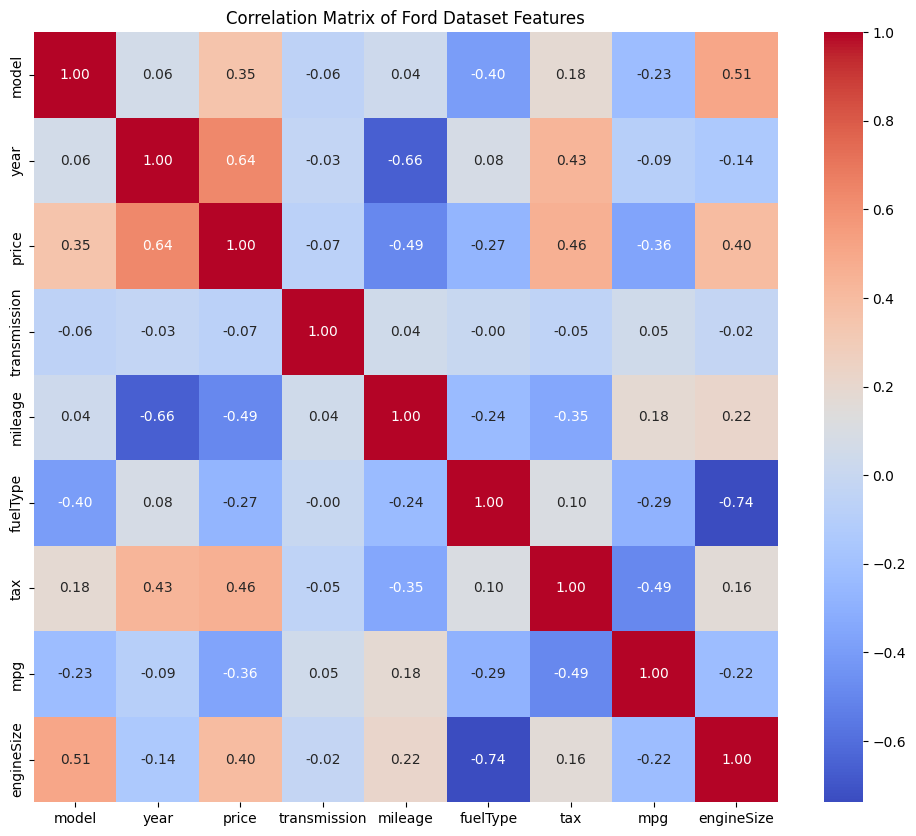

In [50]:
correlation_matrix = forddata.corr()

print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Ford Dataset Features')
plt.show()


The pairplot gives us a scatterplot version of the same context as the previous visualization, it best use is when two features are continous.

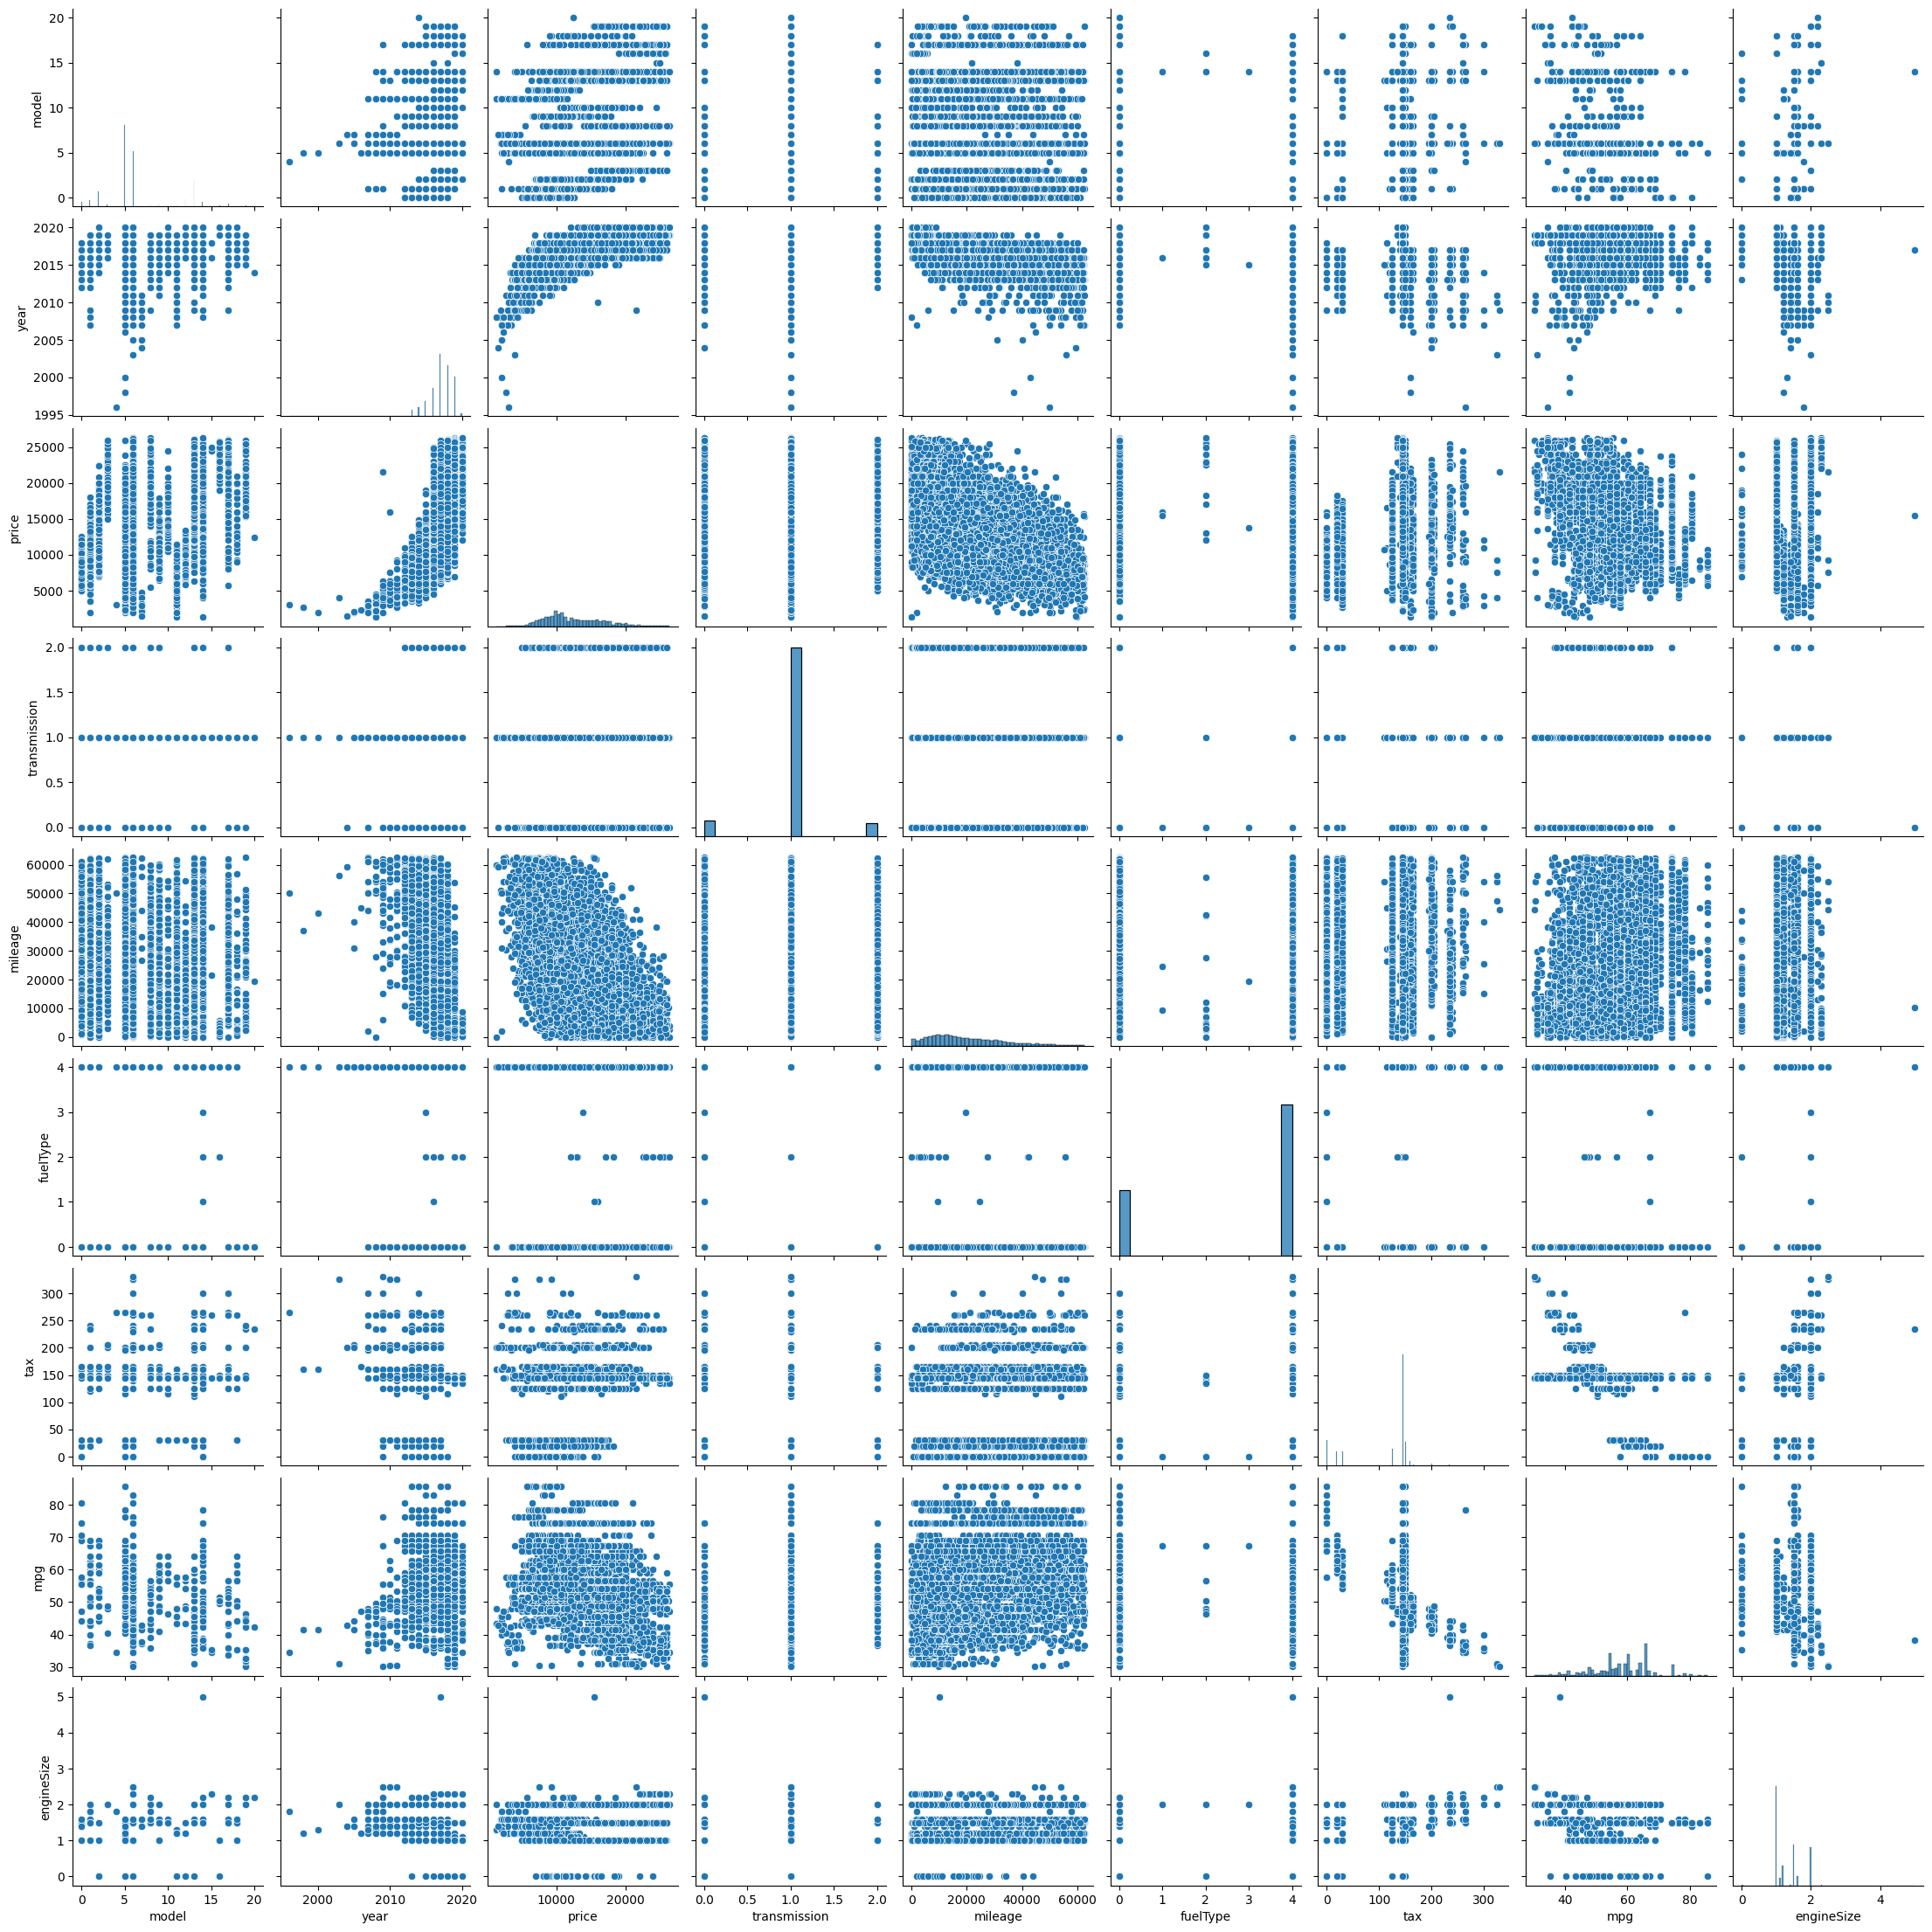

In [51]:
sns.pairplot(forddata)

In our problem we will try to predict the price. First we will start with the mileage alone

In this case we will be examining the relation between mileage and price and building our first regression model on this

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:105: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

/usr/local/lib/python3.11/dist-packages/seaborn/relational.py:438: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



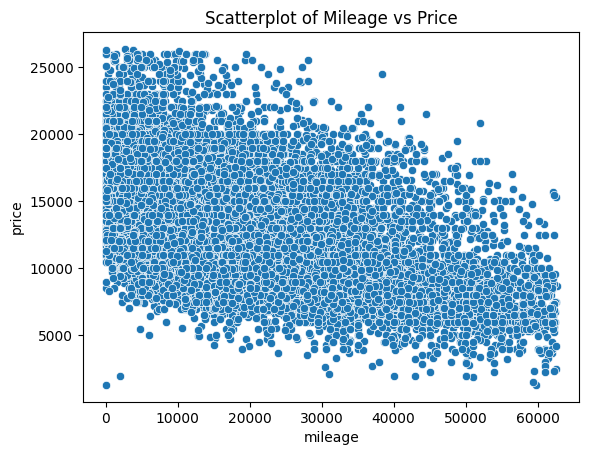

In [126]:
sns.scatterplot(data=forddata, x='mileage', y='price', cmap='viridis')
plt.title('Scatterplot of Mileage vs Price')
plt.show()

Since the point are cluttered together, lets take a sample and visualize the data in a better way, for that we will take a sample of the population and make sure its above 30 so we can follow the CLT

In [127]:
sample_df = forddata.sample(frac=0.04, random_state=42)

In [128]:
sample_df

model  year  price  transmission  mileage  fuelType  tax   mpg  \
15382      5  2017  10289             1    20809         4  145  65.7   
3628       5  2017  10591             2     6217         4  145  47.9   
11297      8  2016  16499             1    36209         0  125  56.5   
8730       2  2017  10000             1    27064         4  160  44.8   
14213      5  2009   5450             1    45000         0   20  67.3   
...      ...   ...    ...           ...      ...       ...  ...   ...   
16295      6  2019  17895             1     1696         4  145  60.1   
9162       2  2014   9000             1    10225         4  125  53.3   
5836       5  2017   8591             1    20084         4  145  64.2   
9020       2  2018  14500             1     7431         4  145  54.3   
15402      6  2015  10000             1    18896         0    0  74.3   

       engineSize  
15382         1.0  
3628          1.6  
11297         2.0  
8730          1.5  
14213         1.6  
...           ...  
16295         1.0  
9162          1.0  
5836          1.1  
9020          1.0  
15402         1.5  

[672 rows x 9 columns]

Here we can notice a negative relation between the two

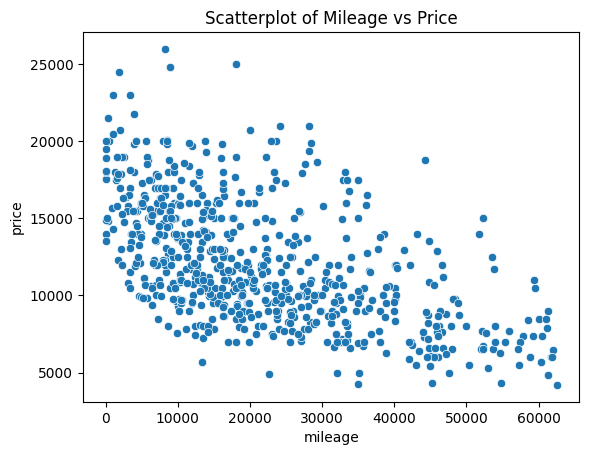

In [129]:
sns.scatterplot(data=sample_df, x='mileage', y='price')
plt.title('Scatterplot of Mileage vs Price')
plt.show()

Here we can observe the distribution of the scatterplot

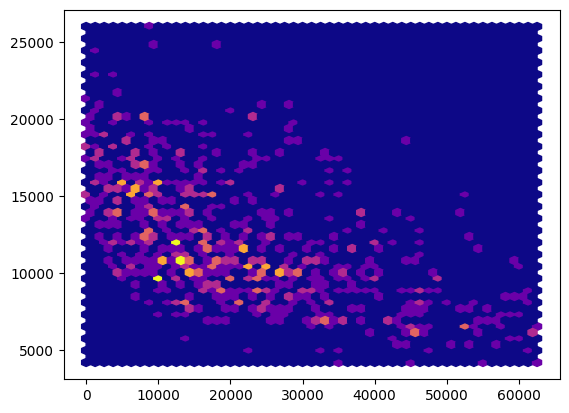

In [130]:
plt.hexbin(data=sample_df,x='mileage', y='price',gridsize=50, cmap='plasma')

Lets draw a line to understand the scatter plot

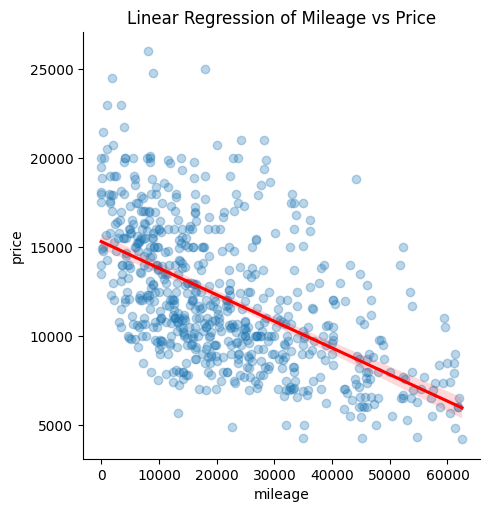

In [131]:
sns.lmplot(x= 'mileage', y='price', data=sample_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Linear Regression of Mileage vs Price')
plt.show()

With the mean price:

In [132]:
mean_price = sample_df['price'].mean()

# **# Question: how does this plot benefit us ?**


# Answer:
SST (Total Sum of Squares): Total variation in the actual values

SSR (Explained): Variation explained by the model

SSE (Residual): Variation the model couldn't explain

note: SST(pred - mean squared) = SSR(actual-mean squared) + SSE(actual - pred squared)


from this scatter we can already conclude that our model wont perform good.

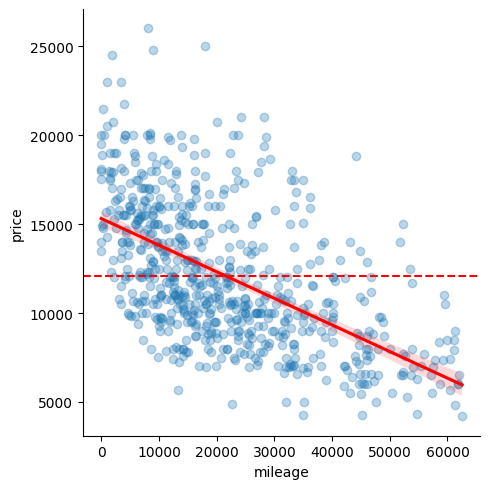

In [133]:
LR = sns.lmplot(x= 'mileage', y='price', data=sample_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})


LR.ax.axhline(mean_price, color='red', linestyle='--')

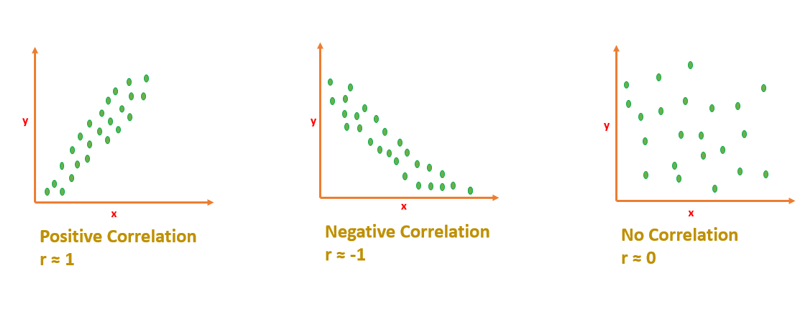

Assigning the test-train split with test size as 0.3 and the random state to shuffle the data:

In [142]:
x=forddata[['mileage']]
y=forddata['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

Applying Linear regression:

In [143]:
lm = LinearRegression()

In [144]:
lm.fit(X_train, y_train)

LinearRegression()

The coeffeicint tells us the change in y(price) per mileage unit decreases:

In [145]:
lm.coef_

array([-0.14570052])

In [146]:
cdf=pd.DataFrame(lm.coef_, x.columns, columns=['Coef'])
cdf

Coef
mileage -0.145701

In [147]:
predictions=lm.predict(X_test)

In [148]:
predictions

array([12521.02816386,  6907.18721913, 10431.39133985, ...,
       13676.43326876,  9092.69498376, 13172.30947772])

# ***Question: What can we interpret and conclude from this Graph?***

# **Answer:** it helps understand if our model is capturing the pattern, meaning if we can that our predictions and actual values are going in the same direction, then we can conclude that our model is on the right path

# **in this case its not capturing the pattern fully because the scatter isnt perfectly diagonal.**

Text(0.5, 0, 'Predictions')

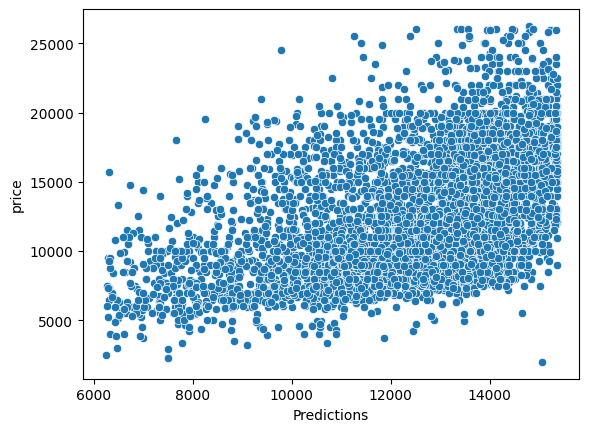

In [149]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")

In [68]:
from sklearn.metrics import mean_squared_error
import math

The mean squared error has large differences of distance between the predicted and actual prices :

In [69]:
mean_squared_error(y_test, predictions)

13583854.280581048

train:

In [70]:
lm.score(X_train, y_train)

0.2458283721126976

test:

In [71]:
lm.score(X_test, y_test)

0.22845654653818748

R2 score:

In [72]:
r2_score(y_test, predictions)

0.22845654653818748

# **The results are telling me my model arent capturing the results and is underfitting, this could be because we need more features to select(Feature selection)**

In [73]:
residulas = y_test - predictions
residulas

17492    1278.971836
5004     4587.812781
13712    1058.608660
8427    -2800.312561
3454    -4199.511747
            ...     
12594    2160.810746
472        49.234590
12451    2223.566731
14074    1897.305016
7339     -873.309478
Name: price, Length: 5041, dtype: float64

# ***Question: what can we get from this plot?***


# **Answer: context: its a residuals plot. We can see a almost normal distribuition with skewness on the right, Also our mean is not zero which is something we are trying to achieve in our model because the residuals mean the difference between the actual and predicted values and if that distance is zero then theres no difference betweeen the actual and predicted which means my model is performing good. Y-Axis (Density): The probability density function (PDF) of the data is shown on the y-axis of the KDE curve. This density shows how likely it is that the variable will take on a particular value the aread under the kde adds up to 1.**



<ipython-input-74-07271a6030f3>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

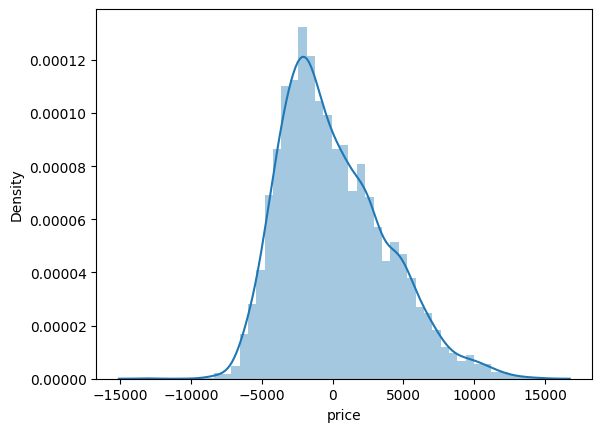

In [74]:
sns.distplot(residulas, kde=True)

# ***Question: what is the difference between this plot and the previous?***


# **Answer:** the difference between q-q plot and residuals distplot is that q-q plot gives us a better detection and vizualization of devaitions in the tails of the distribution than the residual distplot(histogram), both of them give us the conclusion of determining if our residuals plots are the same, but in different way. one focuses on confirming if our mean is zero and has a bell shaped distribution(middle part mainly) while the other focuses on the tails(the end parts).

# ***Question: how do we understand our distribuition from this graph?***



## **Answer: the x axis contains the quantiles of the data, while the ordered values are the residuals in order from smallest to largest, if our datapoints fit on the line fully then our residuals follows a normal distribuition.**

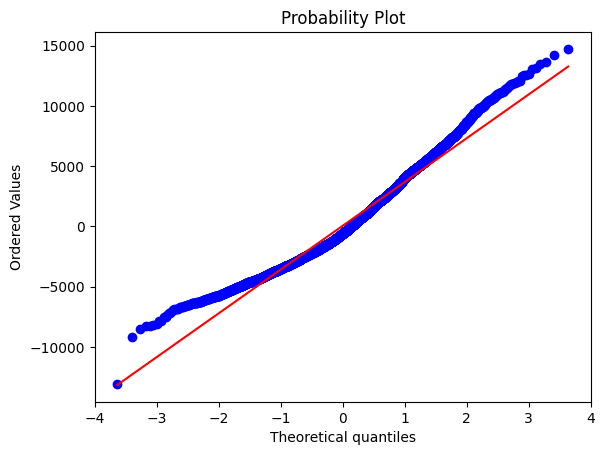

In [75]:
import pylab
import scipy.stats as stats

stats.probplot(residulas, dist="norm", plot=pylab)
pylab.show()

The results are telling me my model arent capturing the results and is underfitting, this could be because we need more features, well try to add the year.

Lets add the year

In [164]:
x=forddata[['mileage','year']]
y=forddata['price']
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=30)


3D scatter plot:

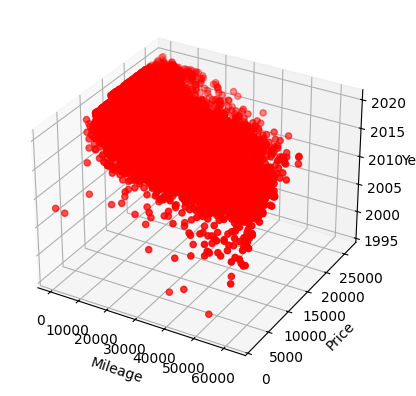

In [172]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x= forddata['mileage']
y= forddata['price']
z= forddata['year']

ax.scatter(x, y, z, c='red', marker='o')

ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
ax.set_zlabel('Year')

plt.show()

Lets take a sample and plot to make the visualization visually appealing

In [173]:
import plotly.graph_objects as go

# Sample data
x = sample_df['mileage']
y = sample_df['price']
z = sample_df['year']

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        opacity=0.8
    )
)])

# Set axis labels
fig.update_layout(
    scene=dict(
        xaxis_title='Mileage',
        yaxis_title='Price',
        zaxis_title='Price'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()

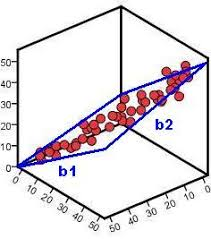

In [79]:
lm.fit(X_train1, y_train1)

LinearRegression()

Here we can see that our year coefficient increases the price by 1.337 per unit.

In [80]:
lm.coef_

array([-3.87031524e-02,  1.31887193e+03])

In [81]:
predictions1=lm.predict(X_test1)

In [82]:
predictions1

array([ 9694.25622663, 10840.76763439, 10458.04754981, ...,
       15276.65996518, 10102.4429855 , 12505.00318787])

# **The predictions became better than before but its more vertical which is also something we are trying to avoid.**

Text(0.5, 0, 'Predictions')

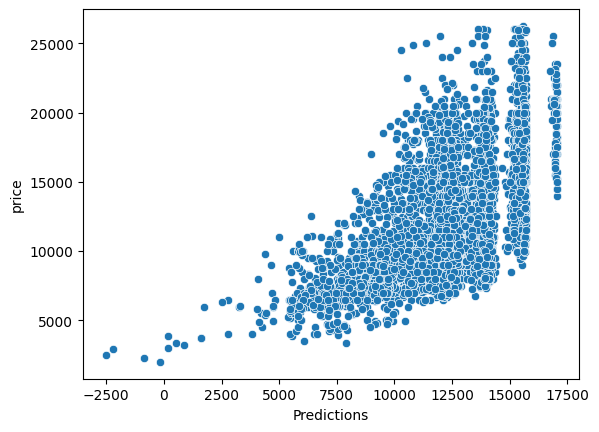

In [83]:
sns.scatterplot(x=predictions1, y=y_test1)
plt.xlabel("Predictions")

My mean error squared decreases which is a good sign

In [84]:
mean_squared_error(y_test1, predictions1)

10498415.437706778

test:

In [85]:
lm.score(X_test1, y_test1)

0.4037050504682963

train

In [86]:
lm.score(X_train1, y_train1)

0.4166415399999084

Our r2 score increased which also tells me that my model accuracy increased

In [87]:
r2_score(y_test1, predictions1)

0.4037050504682963

In [88]:
residulas1 = y_test1 - predictions1
residulas1

17492    4105.743773
5004      654.232366
13712    1031.952450
8427    -4075.351854
3454    -5601.449915
            ...     
12594    1182.221389
472     -1285.785402
12451     623.340035
14074     887.557015
7339     -206.003188
Name: price, Length: 5041, dtype: float64

The skewness decreased and we became closer to the mean but not quite normal

<ipython-input-89-caccfc203b2f>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

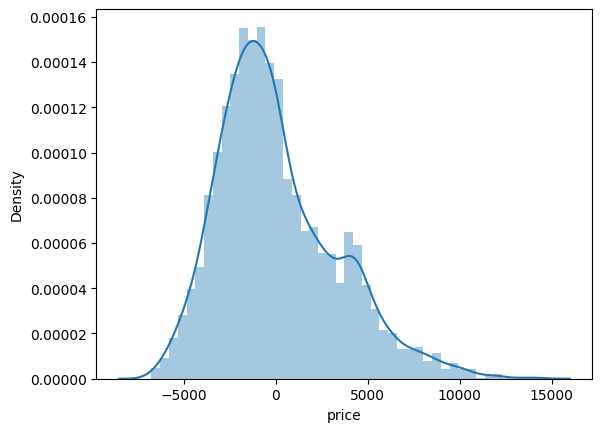

In [89]:
sns.distplot(residulas1, kde=True)

My Q-Q plot became better since the datapoints are more fitted to the line with some heavy tail remaining on the ends.

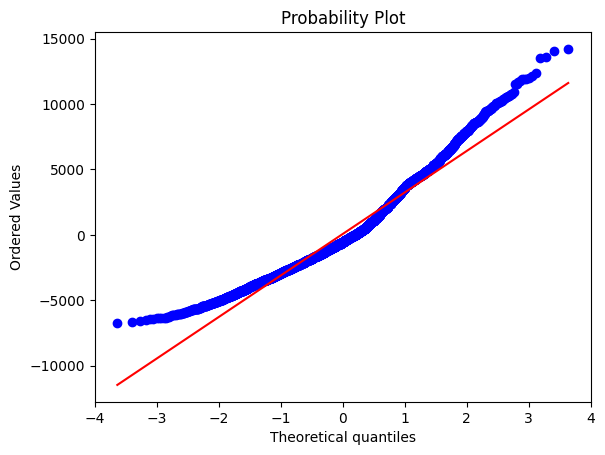

In [90]:
import pylab
import scipy.stats as stats

stats.probplot(residulas1, dist="norm", plot=pylab)
pylab.show()


The accuracy is still not good, and the residuals distribution isnt completely normal. Also the Q-Q plot is confirming this by not fitting the majority of residuals on the line. Therefore we will make another model by adding all the numerical features and scaling the x.

In [174]:
x=forddata[['model', 'year', 'transmission', 'mileage', 'fuelType',
       'mpg', 'engineSize'
       ]]
y=forddata['price']

Lets Scale x:

In [175]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
x = scaler.fit_transform(x)

In [176]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=30)

In [177]:
x

array([[0.25      , 0.875     , 0.        , ..., 1.        , 0.4972973 ,
        0.2       ],
       [0.3       , 0.91666667, 0.5       , ..., 1.        , 0.4972973 ,
        0.2       ],
       [0.3       , 0.875     , 0.5       , ..., 1.        , 0.4972973 ,
        0.2       ],
       ...,
       [0.        , 0.75      , 0.5       , ..., 1.        , 0.4972973 ,
        0.2       ],
       [0.3       , 0.79166667, 0.5       , ..., 0.        , 0.67027027,
        0.32      ],
       [0.55      , 0.91666667, 0.5       , ..., 1.        , 0.4972973 ,
        0.24      ]])

In [178]:
lm.fit(X_train2, y_train2)

LinearRegression()

In [179]:
lm.coef_

array([  801.08646497, 30576.2595873 ,  -471.43097576, -3848.22685862,
       -2102.15565647, -6940.28255005, 14211.82169748])

In [180]:
predictions2=lm.predict(X_test2)

In [181]:
predictions2

array([11018.77530212, 12740.57454832, 10897.06917686, ...,
       15003.90063985, 13474.1892568 , 11117.85250815])

# Here the predictions and actual values are going the same direction in a diagonal way which is what we want with some points not following the pattern

Text(0.5, 0, 'Predictions')

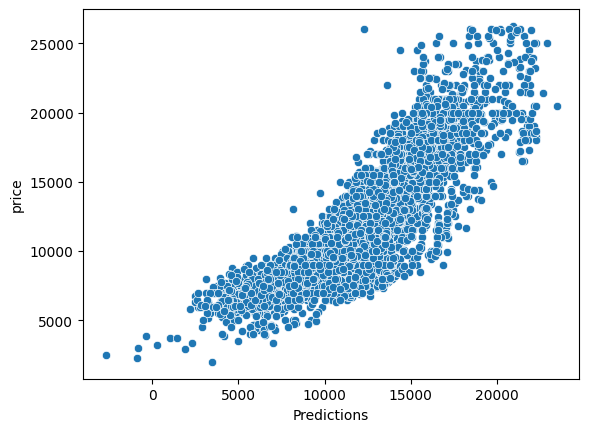

In [158]:
sns.scatterplot(x=predictions2, y=y_test2)
plt.xlabel("Predictions")

In [159]:
mean_squared_error(y_test2, predictions2)

4978407.751210504

test

In [160]:
lm.score(X_test2, y_test2)

0.7172335752599293

train

In [161]:
lm.score(X_train2, y_train2)

0.7255361188742315

In [162]:
r2_score(y_test2, predictions2)

0.7172335752599293

In [163]:
residulas2 = y_test2 - predictions2
residulas2

17492    2781.224698
5004    -1245.574548
13712     592.930823
8427    -1942.220670
3454    -4818.797853
            ...     
12594   -1534.942849
472     -2382.425151
12451     896.099360
14074   -2484.189257
7339     1181.147492
Name: price, Length: 5041, dtype: float64

Here we can conclude from this plot that they have a normal distrbution.

<ipython-input-105-a5c4fd23c267>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

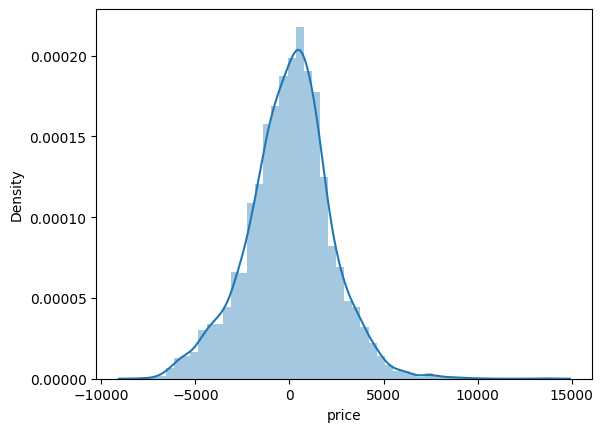

In [105]:
sns.distplot(residulas2, kde=True)

But here we can see the tail more clearly and we can se that the upper tail is a bit skewed with some outliers.

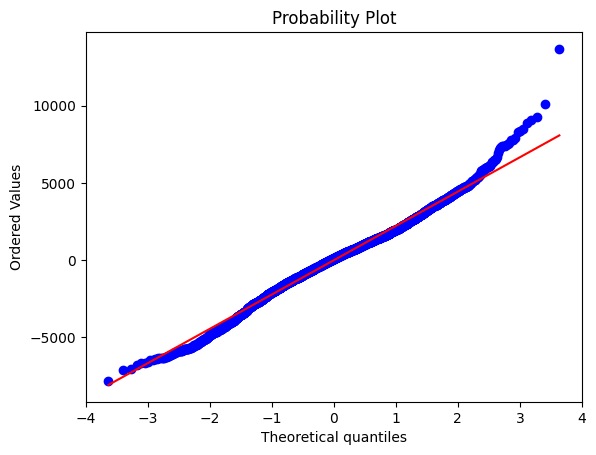

In [106]:
import pylab
import scipy.stats as stats

stats.probplot(residulas2, dist="norm", plot=pylab)
pylab.show()

The accuracy is good, but lets try to make it better by filtering based on years since the does affect the car price significantly. We can have a car with good features ex: mustang with good features but its old like 1999. and then we can have on the other hand a mustang which isnt in good condition but its new. this affect the price of the car since newer models have mechanical superiority than old ones which is one of the key factors

Filtering:

In [107]:
forddata_2000 = forddata[forddata['year'] >= 2000]

In [108]:
forddata_2000

model  year  price  transmission  mileage  fuelType  tax   mpg  \
0          5  2017  12000             0    15944         4  150  57.7   
1          6  2018  14000             1     9083         4  150  57.7   
2          6  2017  13000             1    12456         4  150  57.7   
3          5  2019  17500             1    10460         4  145  40.3   
4          5  2019  16500             0     1482         4  145  48.7   
...      ...   ...    ...           ...      ...       ...  ...   ...   
17960      5  2016   7999             1    31348         4  125  54.3   
17961      0  2017   8999             1    16700         4  150  47.1   
17962      0  2014   7499             1    40700         4   30  57.7   
17963      6  2015   9999             1     7010         0   20  67.3   
17964     11  2018   8299             1     5007         4  145  57.7   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3             1.5  
4             1.0  
...           ...  
17960         1.2  
17961         1.4  
17962         1.0  
17963         1.6  
17964         1.2  

[16800 rows x 9 columns]

In [109]:
x=forddata_2000[['model', 'year', 'transmission', 'mileage', 'fuelType',
       'mpg', 'engineSize']]
y=forddata_2000['price']

In [110]:
x = scaler.fit_transform(x)

In [111]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.3, random_state=30)

In [112]:
lm.fit(X_train3, y_train3)

LinearRegression()

In [113]:
lm.coef_

array([  765.41314341, 26541.40674099,  -458.9637283 , -3779.86779549,
       -1994.52114404,  -160.72070575, -6772.49643157, 15053.35645417])

In [114]:
predictions3=lm.predict(X_test3)
predictions3

array([16839.6382728 , 12369.80590449,  8946.94741843, ...,
       13152.80113641, 14160.5298748 ,  7132.57898615])

Similar to the previous

Text(0.5, 0, 'Predictions')

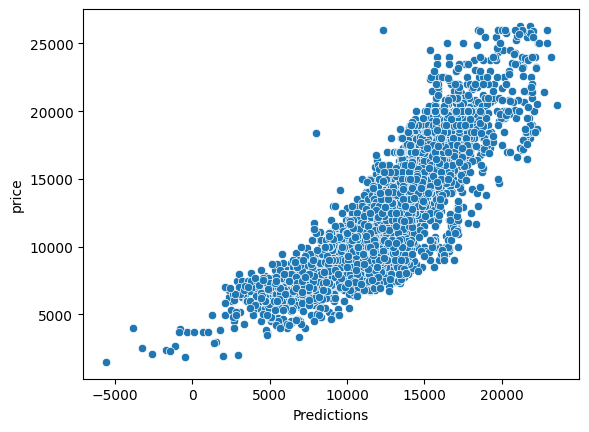

In [115]:
sns.scatterplot(x=predictions3, y=y_test3)
plt.xlabel("Predictions")

In [116]:
mean_squared_error(y_test3, predictions3)

4875608.321888664

Slightly better than before

test

In [117]:
lm.score(X_test3, y_test3)

0.7222097323988458

train

In [118]:
lm.score(X_train3,y_train3)

0.7257461549956323

In [119]:
r2_score(y_test3, predictions3)

0.7222097323988458

In [123]:
mean = forddata['price'].mean()

In [124]:
rmse = np.sqrt(np.mean((y_test2 - predictions2) ** 2))
rmse

np.float64(2231.533327566828)

In [125]:
rmse/mean

np.float64(0.18005999404355172)

In [120]:
residulas3 = y_test3 - predictions3
residulas3

11576    4150.361727
3481      425.194096
7107      548.052582
5842     1356.096794
6311    -2363.564051
            ...     
14071   -1788.691062
8826     -878.208445
2658    -2854.801136
10050    1834.470125
2480     1857.421014
Name: price, Length: 5040, dtype: float64

slightly better than before:

<ipython-input-121-53887b3692fb>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

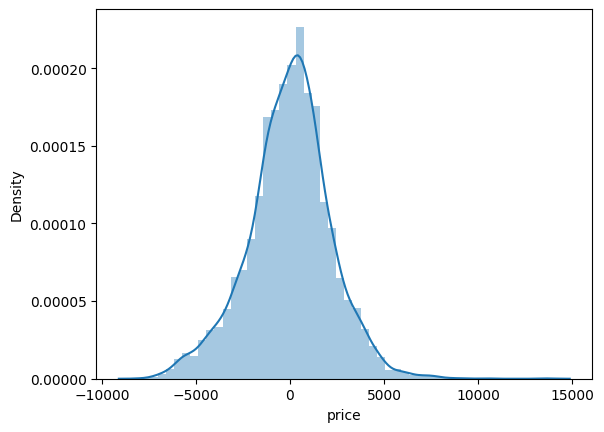

In [121]:
sns.distplot(residulas3, kde=True)

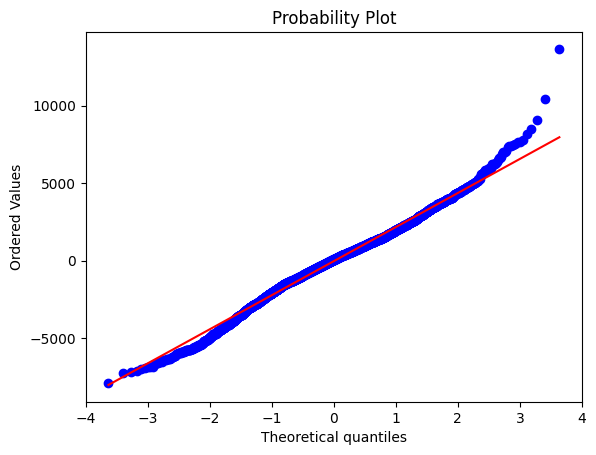

In [122]:
import pylab
import scipy.stats as stats

stats.probplot(residulas3, dist="norm", plot=pylab)
pylab.show()

# **Here We got the same results as previous almost with some small differences**